In [2]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
# iris라는 변수에 붓꽃데이터셋을 넣음
X=iris.data[:,[2,3]]
#iris라는 데이터셋에서 data라는 속성을 가지고옴
# 꽃잎길이와 꽃잎 너비만 사용할 것이므로 행은 전부를 열은 23만 가지고 와서 X에다가 넣는다.
y=iris.target
# iris데이터셋에서 타겟 속성을 가지고와서 y에 넣는다.
print("클래스 레이블:",np.unique(y))
# y값에서 중복다 뺴고 해보면 0,1,2가 나온다 (이미 붓꽃종륙가 0.1.2로 변환되어있다.)

클래스 레이블: [0 1 2]


In [3]:
print(X)
print(X[:, 0].min())

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
# 나누고 비율은 7:3 random_state를 줘서 다음에도 똑같이 나눠지게끔, 클래스 비율을 유지한 채로 데이터셋을 나눌수 있게끔 stratify 특성을 준다. 

In [5]:
print("y의 레이블 카운트:",np.bincount(y))
# y의 빈도수를 세주고 
print("y_train의 레이블 카운트:",np.bincount(y_train))
# y_train의 빈도수를 세주고 
print("y_test의 레이블 카운트:",np.bincount(y_test))

# 다 비율이 똑같은 것을 보니 잘 나누어진것을 확인함


y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
# standatdscaler의 fit매서드는 매개변수의 데이터셋의 샘플과 표준편차를 계산하고
X_train_std=sc.transform(X_train)
# transfrom매서드는 계산된 평균과 표준편차로 정규화를 한다.
X_test_std=sc.transform(X_test)
# 정규화함 

In [7]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train)
# 학습을 시키고 

Perceptron(eta0=0.1, random_state=1)

In [8]:
y_pred=ppn.predict(X_test_std)
print("잘못 분류된 샘플 개수:%d"%(y_test!=y_pred).sum())
# 실제 레이블이랑 예측값이랑 다른거를 더해서 표시해줌

잘못 분류된 샘플 개수:1


In [9]:
from sklearn.metrics import accuracy_score
print("정확도:%.3f"%accuracy_score(y_test,y_pred))
# 메트릭스 모듈에서 사용하는 분류 정확도 지표를 사용해본것


정확도:0.978


In [10]:
print("정확도:%.3f"%ppn.score(X_test_std,y_test))
# 정규화 해본것도 분류정확도 계산해본것 

정확도:0.978


In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02): 

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    # 위의 스트링 원소들을 갖는 튜플을 만듬
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # 위의 스트링 원소들을 갖는 튜플을 만듬
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # y의 종류를 세서(중복값은 제거하고) 배열을 만들고 그 배열의 길이 만치를 컬러스에서 슬라이싱을 하고 listedcolormap에서 불러와서 camp에 넣는다. 

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # X원소(붓꽃데이터에서 붓꽃의 꽃잎 길이, 꽃잎 너비만을 가지고 와서 만든 데이터 프레임) 0번칼럼(꽃잎 길이)에서 최대 최소값에 -1 +1을 해서 
    # 넣는다.
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # 1번칼럼(꽃잎 너비)에 대해서도 똑같이 한다. 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # xx1,xx2에 각각 x1최대 최소 x2최대 최소를 해상도 만큼 쪼갠 배열을 만들어서 그리드를 만들 수 있는 배열을 xx1,xx2에 넣어준다. 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #  xx1을 쭉 핀것과 xx2를 쭉 핀것을 2차원 어레이로 만들고 전치해서 만들고 프레딕트 함수를 써서 Z에 넣는다. 
    Z = Z.reshape(xx1.shape)
    # Z를 xx1의 모양 (xx1은 x1의 최소부터 최소까지 0.02간격으로 쪼개서 만든 배열임) 그 배열 모양으로 Z를 변경해서 다시 Z에 넣는다. 
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # Z값에대해서 xx1,xx2를 축으로 등고선을 그린다 (비슷한거끼리 묶는다)
    # 
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # xx1과 xx2의 상관관계를 그릴것이기에 x제한은 x민맥스로 y제한은 y민맥스로 함
    
    # 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        # idx가 돌아가면서 색깔과 마커를 바꾸면서 그래프를 그린다. 

    # 테스트 샘플을 그리는 부분
    if test_idx:
        # 모든 샘플을 그립니다.test_idx라는 옵션에 대한 내용으로 설정한 test_idx값만큼 X_test에 행을 넣고 y_test에도 행을 넣는다
        # 설정해준 값만큼 테스트셋에서 행수만큼 데이터를 가지고와서 test set이라는 범례명으로 산점도를 그린다.
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')


c:\ProgramData\Anaconda3\envs\mcl1\lib\site-packages\ipykernel_launcher.py:43: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


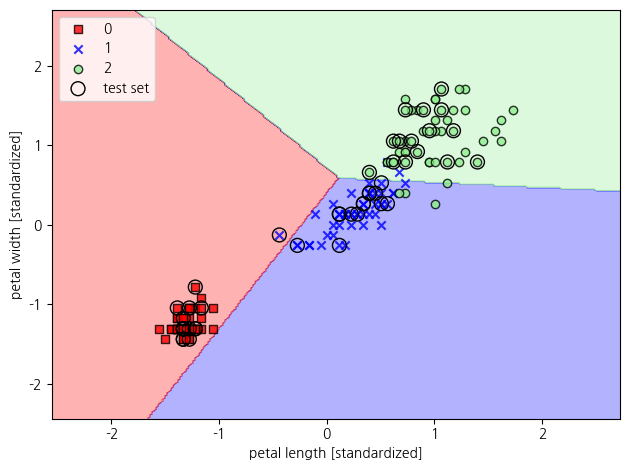

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
# 트레인과 테스트를 쭉 붙여서 그래프를 그려본다. 

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
# 앞에서 정의한 plot_decision_regions함수를 써서 그래프를 그린다. 
# 분류를 할때는 퍼셉트론을 들고와서 한다. 
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
# X와y라벨에 대해서 글씨 써줌
plt.legend(loc='upper left')
# 왼쪽 위로 범례 위치 설정
plt.tight_layout()
# 여백설정
# plt.savefig('images/03_01.png', dpi=300)
plt.show()
# 출력
    

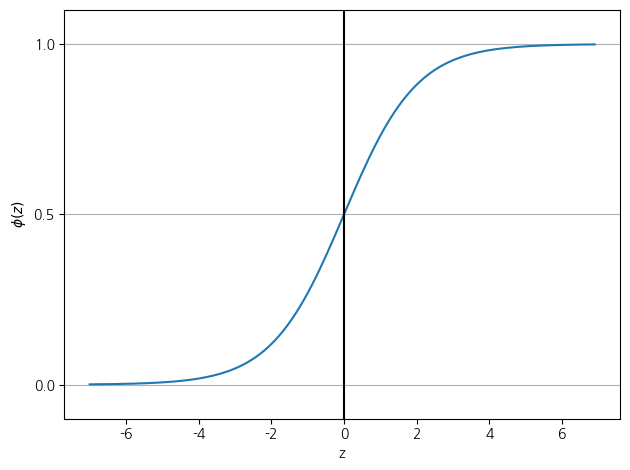

In [13]:
import matplotlib.pyplot as plt
import numpy as np 
def  sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
# 시그모이드 함수를 정의함 
z=np.arange(-7,7,0.1)
# -7부터 7까지 0.1간격을 갖는 배열을 만듬 
phi_z=sigmoid(z)
plt.plot(z,phi_z)
# 입력은 z출력은 시그모이드인 그래프를 그림 
plt.axvline(0.0,color="k")
# x가 0.0인 수직선을 그림 
plt.ylim(-0.1,1.1)
# 그래프상 y의 제한을 걸고 
plt.xlabel("z")
plt.ylabel("$\phi(z)$")
plt.yticks([0.0,0.5,1.0])
# 눈금선을 정하고 
ax=plt.gca()
# ax에 현재의 axis값을 넣어주고
ax.yaxis.grid(True)
# y축에 대해서 격자 표시하기
plt.tight_layout()
# 여백설정
plt.show()
# 그래프 출력
    

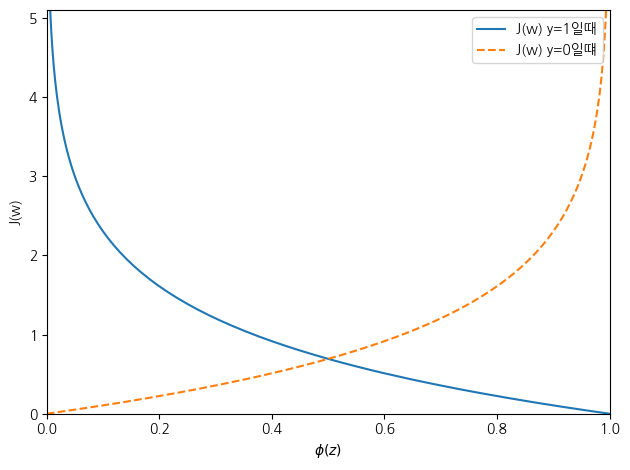

In [14]:
# y값이 1일떄와 0일때 각각 오차함수(여기서는 우도)를 그려본것임
def cost_1(z):
    return -np.log(sigmoid(z))
# 시그모이드에 log를 한다음에 -취한것을 출력함
def cost_0(z):
    return -np.log(1-sigmoid(z))
z=np.arange(-10,10,0.1)
# z에는 -10부터 10까지 0.1간격으로 나눈 값으로 배열을 만들어서 z에 넣고 
phi_z=sigmoid(z)
# 파이 z에는 시그모이드 z를 넣는다. 
c1=[cost_1(x) for x in z]
# c1에는 z값에서 하나씩 꺼내와서 cost_1함수(시그모이드에 로그해서 -취한것)를 적용해서 리스트를 만든다. 
plt.plot(phi_z,c1,label="J(w) y=1일때")
# 파이z를 x에 c1을 y에 라벨은 위에꺼를 넣어서 그래프를 그린다. 
c0=[cost_0(x) for x in z]
# z에서 하나씩 꺼내와서 cost_o에 넣어서 리스트를 만든다. 
plt.plot(phi_z,c0,linestyle="--",label="J(w) y=0일떄")
# 파이z를 x에 c0을 yd에 라벨은 위에꺼를 넣어서 그래프를 그린다. 
plt.ylim(0.0,5.1)
plt.xlim([0,1])
plt.xlabel("$\phi(z)$")
plt.ylabel("J(w)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [15]:
class LogisticRegressionGD(object):
    #로지스틱 회귀 클래스를 정의함
    def __init__(self,eta=0.05,n_iter=100,random_state=1):
        # 초기함수를 이용해서 eta 학습률,n_iter 반복횟수, random_state 난수 생성시 같은 난수값이 나오게 하기위한 시드 
        # 를 초기설정해줌 
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
        # 여기서 self는 객체와 매서드를 바인딩해주는 역할을 함
        
    def fit(self,X,y):
        # 훈련데이터 학습 함수를 정의해줌
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
        # 평균은 0.0 스케일은 0.01의 정규분포에서 x의 열 갯수 +1만치의(shape[1]은 열의 갯수를 뜻한다) 임의의 난수로 w를 만든다 (임의의 가중치를 만드는 과정)
        # 열의 갯수가 입력 갯수이고 +1이 절편떄문에 하는것 
        self.cost_=[]
        # 공리스트를 만들어준다.
        for i in range(self.n_iter):
            # 반복횟수만큼 아래과정을 반복한다.
            net_input=self.net_input(X)
            # 입력받은 X로 최종입력을 계산하고
            output=self.activation(net_input)
            #  최종입력을 활성화 함수에 넣어서 output에 넣어서 출력이 0에서 1사이인 시그모이드 함수 결고를 아웃풋에넣음 
            errors=(y-output)   
            # 실제 레이블에서 결과를 뺴서 에러에 넣고
            self.w_[1:]+=self.eta*X.T.dot(errors)
            # 가중치를 학습률*X*에러로 가중치를 업데이트
            self.w_[0]+=self.eta*errors.sum()
            # 절편 값도 학습률*에러로 업데이트
            cost=(-y.dot(np.log(output))-((1-y).dot(np.log(1-output))))
            # 책에서 정의했던 로지스틱 비용함수를 여기다가 써줌
            self.cost_.append(cost)
            # 공리스트에 오차 값을 업데이트
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    # 절편값은 제외하고 X(입력)과 가중치를 내적한뒤에 절편값을 더해줘서 입력
    
    def activation(self,z):
        return 1./(1.+np.exp(-np.clip(z,-250,250)))
    # 활성화 함수가 달라졌음 시그모이드 함수를 활성화 함수로 쓰는데 클립함수를 써서 일부 값들을 변경함
    
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,0)
    # 프레딕트 함수를 정의하는데 만약 최종 입력이 0보다 크면 1 아니면 0을 출력함
    

c:\ProgramData\Anaconda3\envs\mcl1\lib\site-packages\ipykernel_launcher.py:43: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


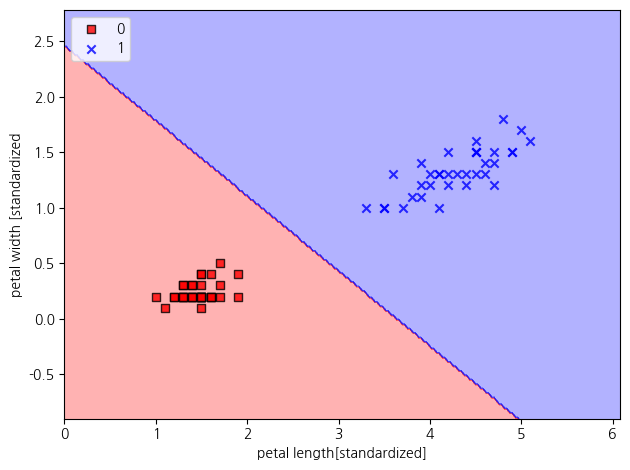

In [16]:
X_train_01_subset=X_train[(y_train==0)|(y_train==1)]
y_train_01_subset=y_train[(y_train==0)|(y_train==1)]
# y값이 0,1,2가 있는데 0,1인 값들면 추려서 서브셋에 넣는다는 뜻임
lrgd=LogisticRegressionGD(eta=0.05,n_iter=1000,random_state=1)
# lrgd는 위에서 정의한 로지스틱회귀GD함수를 가지고와서 파라미터값을 넣어서 변수에 넣어두고
lrgd.fit(X_train_01_subset,y_train_01_subset)
# lrgd에서 fit메서드를 들고와서 학습을 시킴
plot_decision_regions(X=X_train_01_subset,y=y_train_01_subset,classifier=lrgd)
# 그래프 함수 실행 X,y에는 서브셋을 넣고 분류기는 위에서 정의한 lrgd함수를 넣음
plt.xlabel("petal length[standardized]")
plt.ylabel("petal width [standardized")
# X라벨,y라벨 정규화된 꽃잎길이 정규화된 꽃잎 너비라고 쓴다. 
plt.legend(loc="upper left")
# 범례는 왼쪽위에
plt.tight_layout()
# 여백설정
plt.show()
# 그래프 그리기

3.3.4 사이킷런을 사용하여 로지스틱 회귀 모델 훈련 

c:\ProgramData\Anaconda3\envs\mcl1\lib\site-packages\ipykernel_launcher.py:43: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


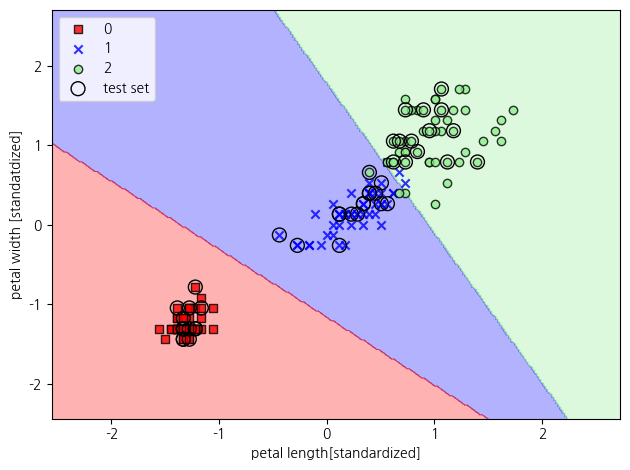

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100.0,random_state=1)
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))
plt.xlabel("petal length[standardized]")
plt.ylabel("petal width [standatdized]")
plt.legend(loc="upper left")    
plt.tight_layout()
plt.show()

In [18]:
lr.predict_proba(X_test_std[:3,:])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [19]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)
# 결과값을 직접 출력해서 argmax 함수를 썼음 그러면 위치값을 출력함


array([2, 0, 0], dtype=int64)

In [20]:
lr.predict(X_test_std[:3,:])
# 그냥 프레딕트 써도 결과는 똑같음

array([2, 0, 0])

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


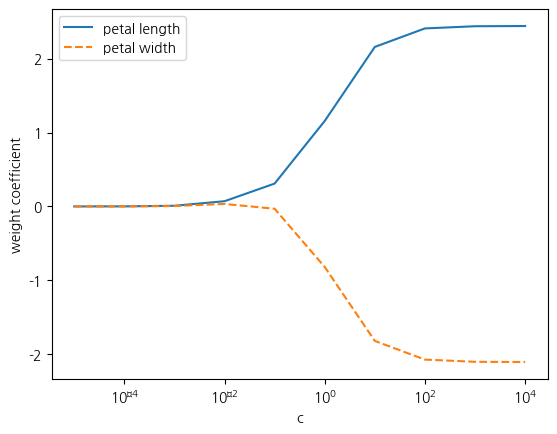

In [21]:
weights,params=[],[]    
# 공리스트를 각각 만듬
for c in np.arange(-5,5):
    # -5부터 5까지 배열을 만들어서 c에다가 하나씩 넣을것임 
    lr=LogisticRegression(C=10.**c,random_state=1,multi_class="ovr")
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights=np.array(weights)
# 웨이트를 배열로 변경함
plt.plot(params,weights[:,0],label="petal length")
plt.plot(params,weights[:,1],linestyle="--",label="petal width")
# x축에는 파라미터, y축에는 웨이트의 0번칼럼 1번 칼럼에 마커 옵션을 변경해서 그래프 그림
plt.ylabel("weight coefficient")    
plt.xlabel("c")
# X,y라벨링 함
plt.legend(loc="upper left")
# 범례는 좌측 상단데
plt.xscale("log")
# 로그스케일로 축 스케일 변경함
plt.show()
# 그래프 출력

3.4 서포트 벡터 머신을 사용한 최대 마진 분류

c:\ProgramData\Anaconda3\envs\mcl1\lib\site-packages\ipykernel_launcher.py:43: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


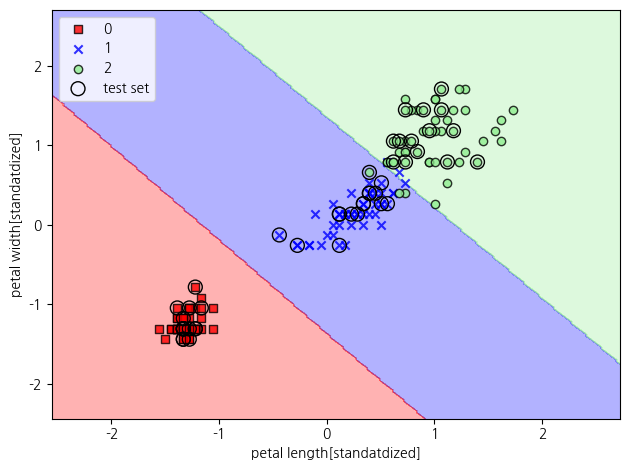

In [22]:
from sklearn.svm import SVC
svm=SVC(kernel="linear",C=1.0,random_state=1)   
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel("petal length[standatdized]")
plt.ylabel("petal width[standatdized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

3.5.1 선형적으로 구분되지 않는 데이터를 위한 커널 방법

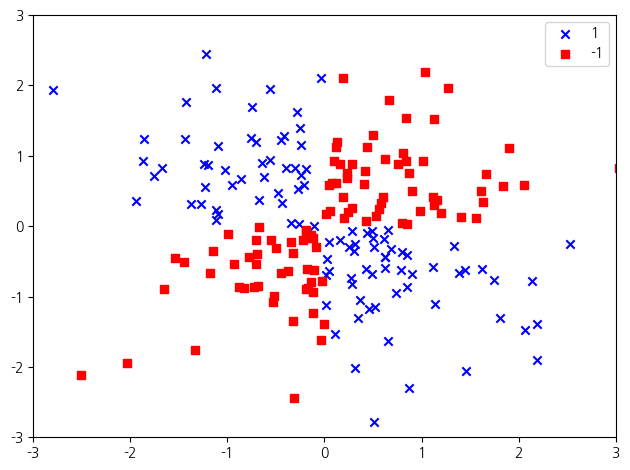

In [23]:
# 선형 경계로 구분되지 않는 데이터셋을 만드는 게 목적임
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)   
# 난수 생성을 제어하기 위해서 랜덤 시드를 설정해줌
X_xor=np.random.randn(200,2)
# 200,2형태의 평균이0 표준편차가1인 난수 배열을 생성함 X_xor
y_xor=np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
# 둘중하나가 1이면 0을 출력하는 xor연산을 해서 y_xor 배열을 만든다.
y_xor=np.where(y_xor,1,-1)  
# y_xor에 y_xor값이 1(참)이면 1 0(거짓)이면 -1을 출력해서 y_xor에 넣는다.
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c="b",marker="x",label="1")
# y_xor에서 값이 1인놈들의 0번칼럼과 1번칼럼의 산점도를 파란색으로
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c="r",marker="s",label="-1")
# y_xor에서 값이 -1인놈들의 0번칼럼과 1번칼럼의 산점도를 빨간색으로
plt.xlim([-3,3])
plt.ylim([-3,3])
# 축 숫자 제한
plt.legend(loc="best")
# 범례위치
plt.tight_layout()
# 여백설정
plt.show()
# 그래프 출력

둘이 선형 경계로 구분되지 않기에 고차원 공간으로 변환해서 거기서 결정경계를 찾음
변환에 가장 잘 사용되는 커널이 방사기저함수임

c:\ProgramData\Anaconda3\envs\mcl1\lib\site-packages\ipykernel_launcher.py:43: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


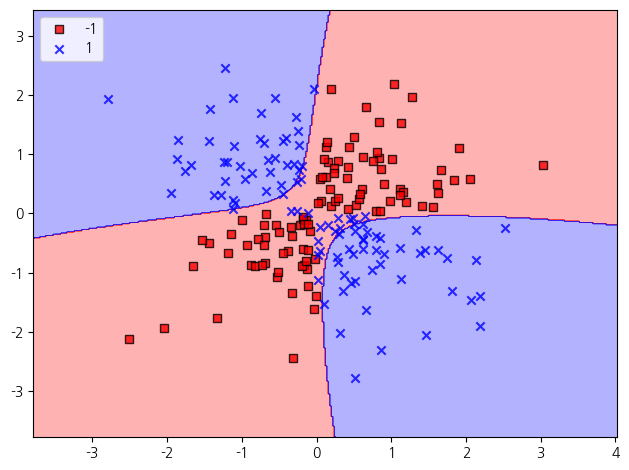

In [24]:
svm=SVC(kernel="rbf",random_state=1,gamma=0.10,C=10.0)
# svm이라는 함수는 SVC에서 상기의 파라미터를 설정해준것으로 정의 여기서 감마는 가우시간 구의 크기를 제한하는 매개변수임
svm.fit(X_xor,y_xor)
# svm을 써서 X_xor과 y_xor을 학습시킴
plot_decision_regions(X_xor,y_xor,classifier=svm)
# X_xor과 y_xor의 결정경계를 그리고 분류모델은 svm을 사용
plt.legend(loc="upper left")
# 범례 위치 설정
plt.tight_layout()
# 여백 설정
plt.show()
# 그래프 출력

c:\ProgramData\Anaconda3\envs\mcl1\lib\site-packages\ipykernel_launcher.py:43: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


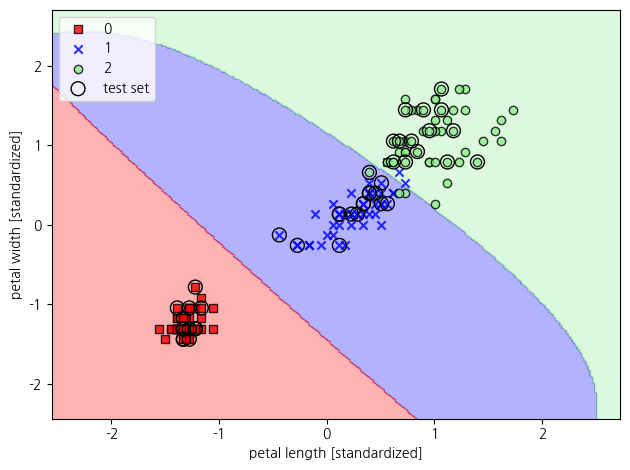

In [25]:
svm=SVC(kernel="rbf",random_state=1,gamma=0.2,C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel("petal length [standardized]")   
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()
# 감마값을 작게만드니 경정경계가 부드럽고 클래스와 멀리있임
# 여기서 쓴 데이터 샘플은 바로 위에서 썼던 샘플과는 다른샘플임

c:\ProgramData\Anaconda3\envs\mcl1\lib\site-packages\ipykernel_launcher.py:43: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


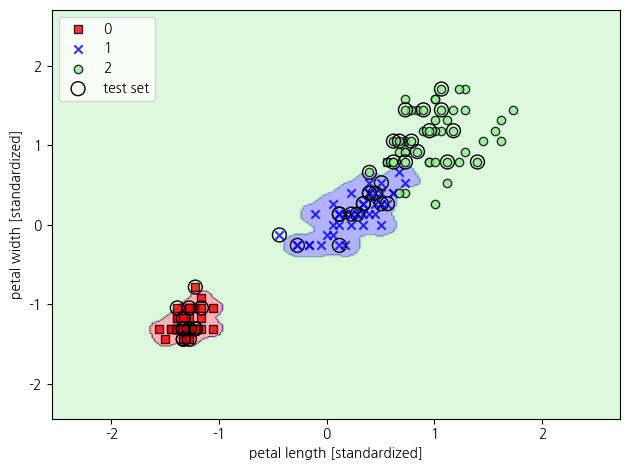

In [26]:
svm=SVC(kernel="rbf",random_state=1,gamma=100.0,C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel("petal length [standardized]")   
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()
# 감마값을 키우니 결정경게가 클래스 주위로 매우 가깝게 나타남
# 즉 감마값이 과대적합 혹은 분산을 조절하는 역할을 함


3.6 결정 트리 학습

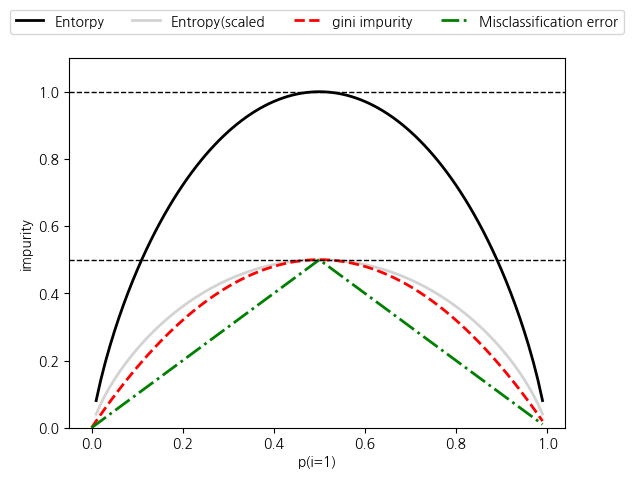

In [34]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
    return (p)*(1-(p))+(1-p)*(1-(1-p))
def entropy(p):
    return -p*np.log2(p)-(1-p)*np.log2((1-p))
def error(p):
    return 1-np.max([p,1-p])
# 지니, 엔트로피, 에러함수를 정의함
x=np.arange(0.0,1.0,0.01)
# x에는 0부터 1까지 0.01간격으로 원소를 갖는 리스트를 만듬
ent=[entropy(p) if p != 0 else None for p in x]
sc_ent=[e*0.5 if e else None for e in ent]
err=[error(i) for i in x]
# 지니,스케일드 엔트로피, 에러에 대해서 앞에서 정의한 x값을 넣으면서 리스트를 만듬
fig=plt.figure()    
# 새로운 캠퍼스에 그림을 그린다는 뜻
ax=plt.subplot(111)
# 행1개 열 1개중에 1번째 위치에 그래프를 그린다. 
for i, lab,ls,c in zip([ent,sc_ent,gini(x),err],["Entorpy","Entropy(scaled)","gini impurity","Misclassification error"],
                        ["-","-","--","-."],["black","lightgray","red","green","cyan"]):
    line=ax.plot(x,i,label=lab,linestyle=ls,lw=2,color=c)
# zip함수로 엔트로피,스케일드 엔트로피, 지니,에러로 튜플을 만들고 각각 플롯을 그린다.
ax.legend(loc="upper center",bbox_to_anchor=(0.5,1.15),ncol=5,fancybox=True,shadow=False)
# 범례는 가운데 위에 여러 옵션을 줘서 위치 시킨다는 끗
ax.axhline(y=0.5,linewidth=1,color="k",linestyle="--")
ax.axhline(y=1.0,linewidth=1,color="k",linestyle="--")
# 0.5,1.0위치엣 수평선 그림
plt.ylim([0,1.1])
# y축에는 1.1리미티
plt.xlabel("p(i=1)")
# x라벨에는 p(i=1)
plt.ylabel("impurity")
# y라벨에는 불순도
plt.show()
# 그래프 출력

c:\ProgramData\Anaconda3\envs\mcl1\lib\site-packages\ipykernel_launcher.py:43: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


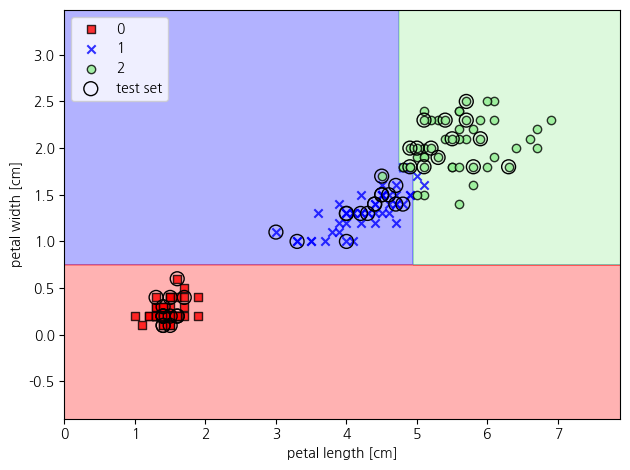

In [39]:
from sklearn.tree import DecisionTreeClassifier
# 의사결정 나무 모듈을 임포트
tree=DecisionTreeClassifier(criterion="gini",max_depth=4,random_state=1)   
# tree라는 변수에 의사결정나무 함수를 불러오고 불순도 지표는 지니 최대 깊이는 4 를 줌 
tree.fit(X_train,y_train)
# 학습 시킴
X_combined=np.vstack((X_train,X_test))
# X컴파인이라는 변수에 X트레인과 X테스트 데이터를 수직으로 쌓아서 저장하고
y_combined=np.hstack((y_train,y_test))
# y컴파인이라는 변수에 y트레인과 y테스트 셋을 옆으로 붙임
plot_decision_regions(X_combined,y_combined,classifier=tree,test_idx=range(105,150))   
# 결정 경계를 그림 105이상 150미만의 리스트를 생성함
plt.xlabel("petal length [cm]")
plt.ylabel("petal width [cm]")
# x축 y축 문구 설정
plt.legend(loc="upper left")
# 범례는 좌측 상단
plt.tight_layout()
# 여백 조정
plt.show()
# 플롯 출력

In [47]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()
# 오류남 이유 모름

NameError: name 'tree_model' is not defined